In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models ,layers
import matplotlib as plt


In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/Users/adarshgupta/Downloads/archive/plantv",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1]


In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())


[[[172. 174. 187.]
  [170. 172. 185.]
  [174. 176. 189.]
  ...
  [208. 207. 215.]
  [202. 201. 209.]
  [185. 184. 192.]]

 [[170. 172. 185.]
  [169. 171. 184.]
  [172. 174. 187.]
  ...
  [217. 216. 224.]
  [212. 211. 219.]
  [201. 200. 208.]]

 [[176. 178. 191.]
  [176. 178. 191.]
  [179. 181. 194.]
  ...
  [205. 204. 212.]
  [196. 195. 203.]
  [191. 190. 198.]]

 ...

 [[122. 116. 126.]
  [120. 114. 124.]
  [124. 118. 128.]
  ...
  [126. 120. 132.]
  [127. 121. 133.]
  [134. 128. 140.]]

 [[122. 116. 126.]
  [120. 114. 124.]
  [124. 118. 128.]
  ...
  [122. 116. 128.]
  [123. 117. 129.]
  [130. 124. 136.]]

 [[119. 113. 123.]
  [115. 109. 119.]
  [120. 114. 124.]
  ...
  [129. 123. 135.]
  [131. 125. 137.]
  [137. 131. 143.]]]


In [8]:
import matplotlib.pyplot as plt 

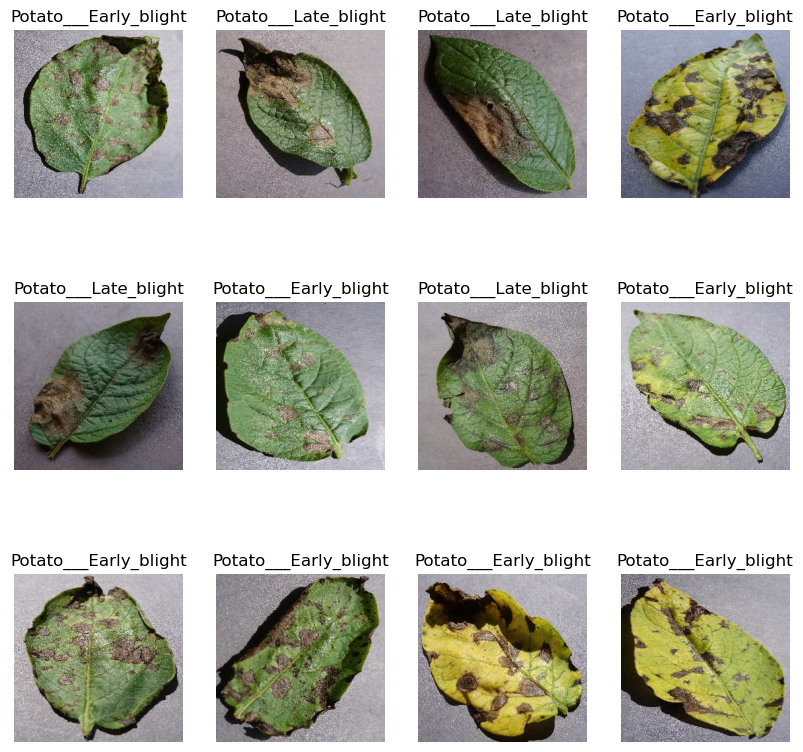

In [9]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")


In [10]:
len(dataset)

68

In [11]:
completion_percentage = 80

if completion_percentage >=80:
    status = 'training'
else:
    status = 'not training'
    
completion_percentage = 20

if completion_percentage >= 20:
    status = 'training'
else: 
    status = 'non training'


In [12]:
train_size = 0.8
len(dataset)*train_size


54.400000000000006

In [13]:
train_ds= dataset.take(54)
len(train_ds)


54

In [14]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [30]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [16]:
val_ds=test_ds.take(6)
len(val_ds)


6

In [17]:
test_ds= test_ds.skip(6)
len(test_ds)

8

In [45]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    #get the total number of elements or batches in the dataset
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [19]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [20]:
len(train_ds)

54

In [21]:
len(val_ds)

6

In [22]:
len(test_ds)

8

In [23]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [24]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [25]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [26]:

input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE,CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [28]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [29]:
history= model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 85s 2s/step - loss: 0.9283 - accuracy: 0.4728 - val_loss: 0.9697 - val_accuracy: 0.4323
Epoch 2/50
54/54 [==============================] - 71s 1s/step - loss: 0.7651 - accuracy: 0.6030 - val_loss: 0.7057 - val_accuracy: 0.6250
Epoch 3/50
54/54 [==============================] - 70s 1s/step - loss: 0.5125 - accuracy: 0.7743 - val_loss: 0.4361 - val_accuracy: 0.7969
Epoch 4/50
54/54 [==============================] - 72s 1s/step - loss: 0.4245 - accuracy: 0.8264 - val_loss: 0.4134 - val_accuracy: 0.7760
Epoch 5/50
54/54 [==============================] - 74s 1s/step - loss: 0.4244 - accuracy: 0.8247 - val_loss: 0.3673 - val_accuracy: 0.8125
Epoch 6/50
54/54 [==============================] - 70s 1s/step - loss: 0.2561 - accuracy: 0.9034 - val_loss: 0.2341 - val_accuracy: 0.9115
Epoch 7/50
54/54 [==============================] - 68s 1s/step - loss: 0.1711 - accuracy: 0.9381 - val_loss: 0.2246 - val_accuracy: 0.9271
Epoch 8/50
54/54 [==

In [31]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 2s 157ms/step - loss: 0.0174 - accuracy: 0.9922


In [32]:
scores

[0.01740175485610962, 0.9921875]

In [33]:
history

In [34]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

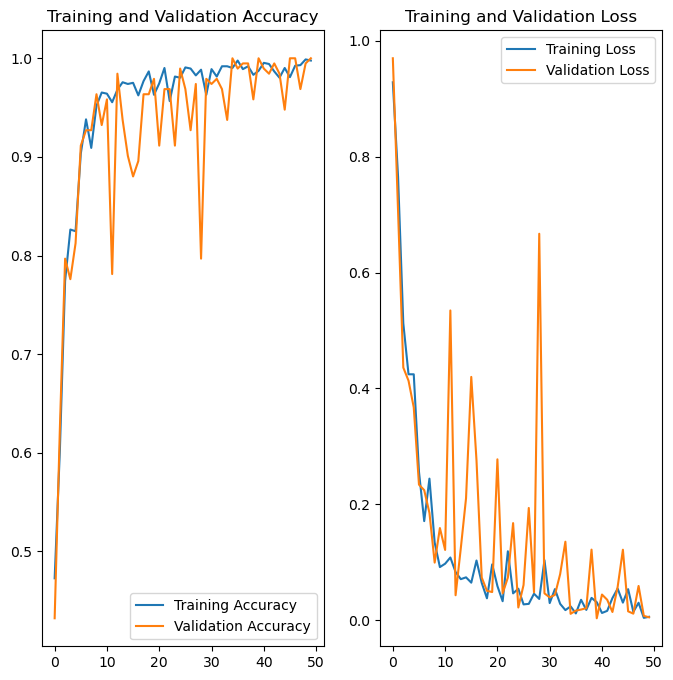

In [37]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [38]:
import numpy as np



In [39]:
np.argmax([1.0000000e+00, 9.9674663e-14, 4.9049444e-31])

0

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 281ms/step
predicted label: Potato___Late_blight


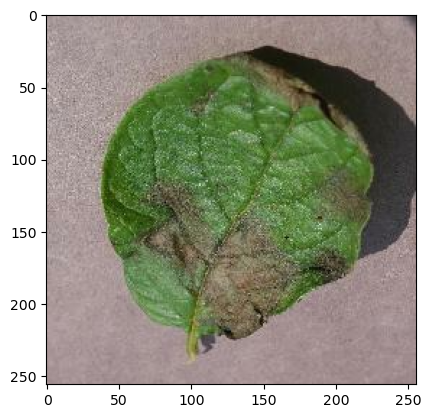

In [40]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [41]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 15ms/step


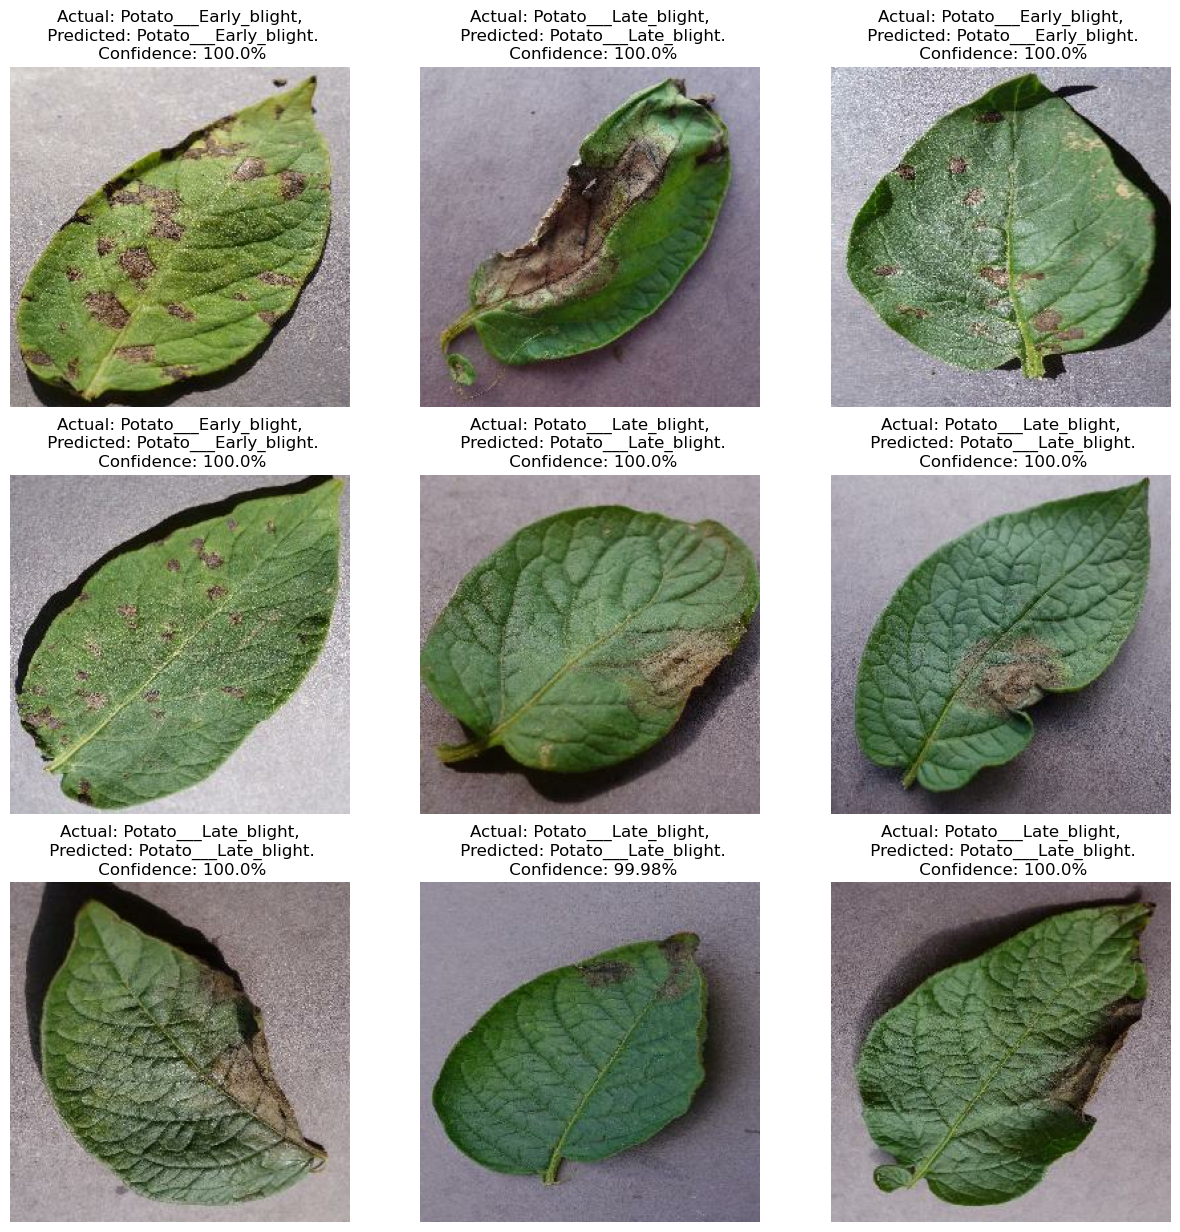

In [42]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")